# Chapter 2 | Small Worlds and Large Worlds

In [1]:
import numpy as np
class Object(object): pass
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binom
from scipy import stats
import pandas as pd
from typing import List
import pymc3 as pm

## 2.3

Define Grid:

In [2]:
NUM = 20
p_grid = np.linspace(start=0, stop=1, num=NUM)
p_grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

Define prior:

In [3]:
prior = np.repeat(1, NUM)
prior

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
likelihood = binom.pmf(k=6, n=9, p=p_grid)
likelihood

array([0.00000000e+00, 1.51814898e-06, 8.18509295e-05, 7.77292279e-04,
       3.59857537e-03, 1.11609461e-02, 2.66829865e-02, 5.29210991e-02,
       9.08269760e-02, 1.38341326e-01, 1.89768623e-01, 2.36114658e-01,
       2.66611252e-01, 2.71400562e-01, 2.45005089e-01, 1.89768623e-01,
       1.17918118e-01, 5.02667021e-02, 8.85384487e-03, 0.00000000e+00])

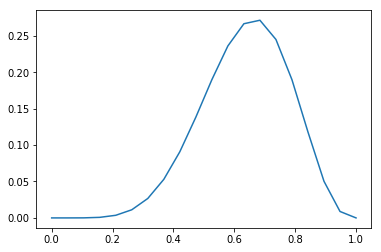

In [5]:
plt.plot(p_grid, likelihood)

In [6]:
unstd = Object()
unstd.posterior = likelihood * prior
unstd.posterior

array([0.00000000e+00, 1.51814898e-06, 8.18509295e-05, 7.77292279e-04,
       3.59857537e-03, 1.11609461e-02, 2.66829865e-02, 5.29210991e-02,
       9.08269760e-02, 1.38341326e-01, 1.89768623e-01, 2.36114658e-01,
       2.66611252e-01, 2.71400562e-01, 2.45005089e-01, 1.89768623e-01,
       1.17918118e-01, 5.02667021e-02, 8.85384487e-03, 0.00000000e+00])

In [7]:
posterior = unstd.posterior / sum(unstd.posterior)
posterior

array([0.00000000e+00, 7.98983711e-07, 4.30771684e-05, 4.09079660e-04,
       1.89388732e-03, 5.87387288e-03, 1.40429377e-02, 2.78517436e-02,
       4.78011547e-02, 7.28073907e-02, 9.98729639e-02, 1.24264330e-01,
       1.40314323e-01, 1.42834880e-01, 1.28943257e-01, 9.98729639e-02,
       6.20588995e-02, 2.64547661e-02, 4.65967300e-03, 0.00000000e+00])

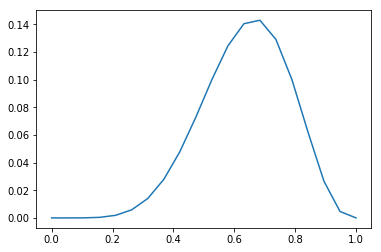

In [8]:
plt.plot(p_grid, posterior)

## 2.5 - Different Priors

### Step

In [9]:
def post(prior_, num_):
    p_grid = np.linspace(start=0, stop=1, num=num_)
    likelihood = binom.pmf(k=6, n=9, p=p_grid)
    unst_posterior = likelihood * prior_
    posterior = unst_posterior / unst_posterior.sum()
    return posterior

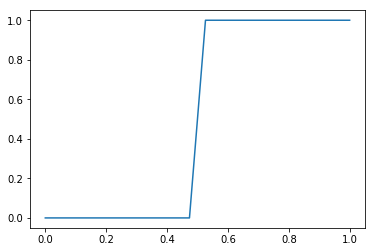

In [10]:
step = Object()
step.prior = (p_grid >= 0.5).astype(np.int)
plt.plot(p_grid, step.prior)

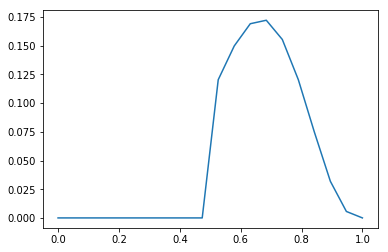

In [11]:
step.post = post(step.prior, NUM)
plt.plot(p_grid, step.post)

### Peak

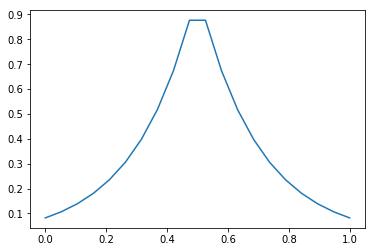

In [12]:
peak = Object()
peak.prior = np.exp(-5 * np.abs(p_grid - 0.5))
plt.plot(p_grid, peak.prior)

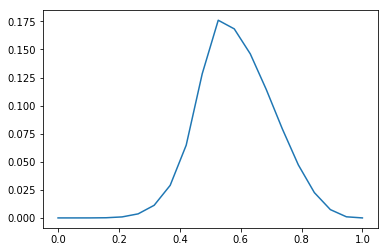

In [13]:
peak.likelihood = binom.pmf(k=6, n=9, p=p_grid)
peak.unstd_post = peak.likelihood * peak.prior
peak.post = peak.unstd_post / np.sum(peak.unstd_post)
plt.plot(p_grid, peak.post)

# Quadratic Approximation

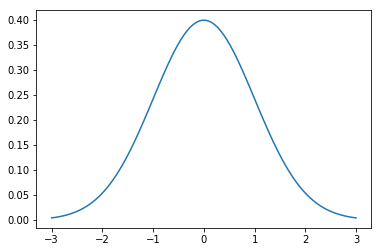

In [14]:
from scipy.stats import norm
normal = Object()
normal.grid = np.linspace(-3, 3, 100)
normal.norm = norm.pdf(normal.grid)
plt.plot(normal.grid, normal.norm)

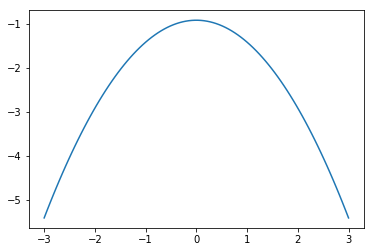

In [15]:
plt.plot(normal.grid, np.log(normal.norm))

## MAP

See the problem in https://www.probabilitycourse.com/chapter9/9_1_2_MAP_estimation.php

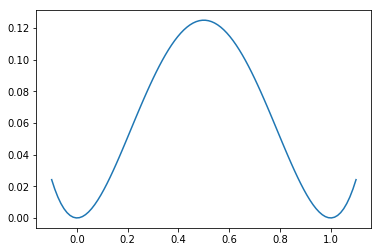

In [16]:
_m = Object()
_m.x = np.linspace(-0.1, 1.1, 100)
_m.f_x = 2 * _m.x**2 * (1 - _m.x)**2
plt.plot(_m.x, _m.f_x)

As the analytical solution shows we have three points where the derivative is zero: $x=0$, $x=1$, and $x=\frac{1}{2}$. The value $x=\frac{1}{2}$ maximizes the function, and is the answer.

# 2.6

In [17]:
_26 = Object()
_26.data = np.repeat((0, 1), (3, 6))
with pm.Model() as _26.na:
    _26.p = pm.Uniform('p', 0, 1)
    _26.w = pm.Binomial('w', n=len(_26.data), p=_26.p, observed=_26.data.sum())
    _26.mean_p = pm.find_MAP()
    _26.std_q = ((1/pm.find_hessian(_26.mean_p, vars=[_26.p]))**0.5)[0]
    
_26.mean_p['p'], _26.std_q

/Users/kalininalex/miniconda3/envs/py36/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 627.41it/s]


(array(0.66666667), array([0.15713484]))

Assuming the posterior is Gaussian, it's maximized at $0.67$ and its standard deviation is $0.16$.

89% confidence interval:

In [18]:
_26.norm_dist = stats.norm(_26.mean_p['p'], _26.std_q)
_26.z = stats.norm.ppf([(1 - .89) / 2, 1 - (1 - 0.89) / 2])
print("89% confidence interval:", _26.mean_p['p'] + _26.std_q * _26.z)

89% confidence interval: [0.41553484 0.91779849]


# Medium
## 2M1

In [19]:
_2m1 = Object()
_2m1.NUM = 100
_2m1.p_grid = np.linspace(0, 1, _2m1.NUM)
_2m1.prior = np.repeat(1, _2m1.NUM)

### Item 1 | W, W, W

In [20]:
_2m1.item_1 = Object()
_2m1.item_1.likelihood = binom.pmf(k=3, n=3, p=_2m1.p_grid)
_2m1.item_1.unstd_post = _2m1.prior * _2m1.item_1.likelihood
_2m1.item_1.post = _2m1.item_1.unstd_post / _2m1.item_1.unstd_post.sum()

Confirm Posterior sums up to 1: 1.0


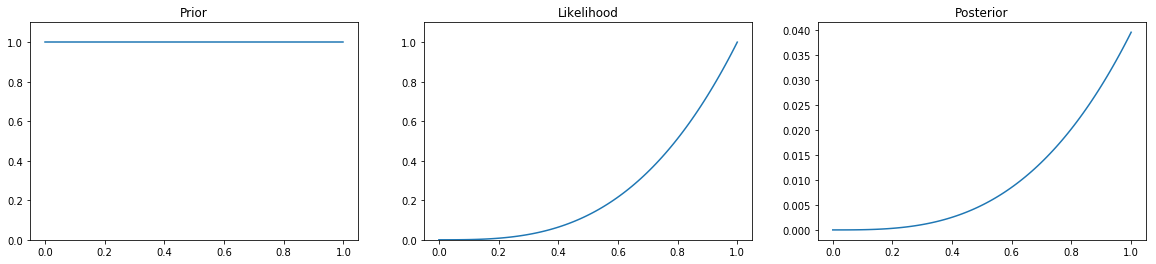

In [21]:
_2m1.item_1.fig = plt.figure(figsize=(20, 4))
_2m1.item_1.axes = _2m1.item_1.fig.add_subplot(131)
_2m1.item_1.axes.set_title("Prior")
_2m1.item_1.axes.set_ylim([0, 1.1])
_2m1.item_1.axes.plot(_2m1.p_grid, _2m1.prior)
_2m1.item_1.axes = _2m1.item_1.fig.add_subplot(132)
_2m1.item_1.axes.set_title("Likelihood")
_2m1.item_1.axes.set_ylim([0, 1.1])
_2m1.item_1.axes.plot(_2m1.p_grid, _2m1.item_1.likelihood)
_2m1.item_1.axes = _2m1.item_1.fig.add_subplot(133)
_2m1.item_1.axes.set_title("Posterior")
_2m1.item_1.axes.plot(_2m1.p_grid, _2m1.item_1.post)
print("Confirm Posterior sums up to 1:", _2m1.item_1.post.sum())

### Item 2 | W, W, W, L

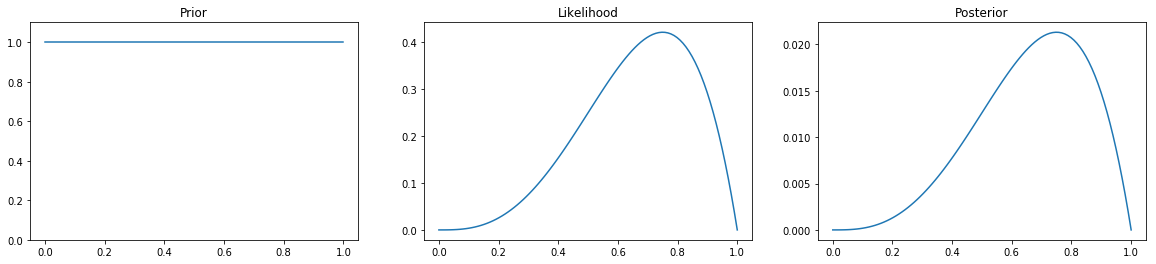

In [22]:
_2m1.item_2 = Object()
_2m1.item_2.likelihood = binom.pmf(k=3, n=4, p=_2m1.p_grid)
_2m1.item_2.unstd_post = _2m1.prior * _2m1.item_2.likelihood
_2m1.item_2.post = _2m1.item_2.unstd_post / _2m1.item_2.unstd_post.sum()

_2m1.item_2.fig = plt.figure(figsize=(20, 4))
_2m1.item_2.axes = _2m1.item_2.fig.add_subplot(1, 3, 1)
_2m1.item_2.axes.set_title("Prior")
_2m1.item_2.axes.set_ylim([0, 1.1])
_2m1.item_2.axes.plot(_2m1.p_grid, _2m1.prior)
_2m1.item_2.axes = _2m1.item_2.fig.add_subplot(1, 3, 2)
_2m1.item_2.axes.set_title("Likelihood")
_2m1.item_2.axes.plot(_2m1.p_grid, _2m1.item_2.likelihood)
_2m1.item_2.axes = _2m1.item_2.fig.add_subplot(1, 3, 3)
_2m1.item_2.axes.set_title("Posterior")
_2m1.item_2.axes.plot(_2m1.p_grid, _2m1.item_2.post)

### Item 3 | L, W, W, L, W, W, W

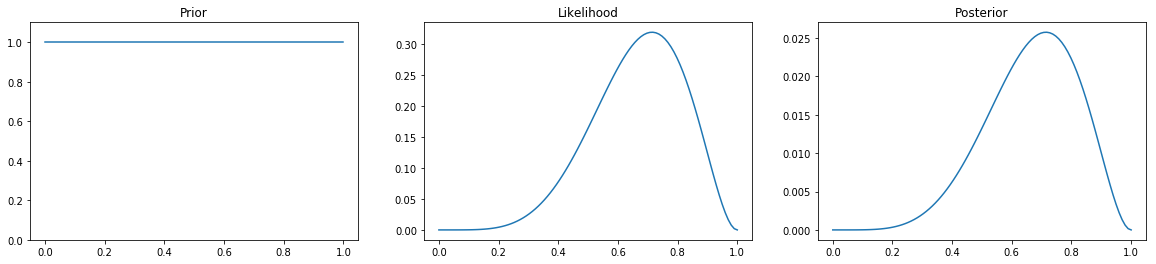

In [23]:
_2m1.item_3 = Object()
_2m1.item_3.likelihood = binom.pmf(k=5, n=7, p=_2m1.p_grid)
_2m1.item_3.unstd_post = _2m1.prior * _2m1.item_3.likelihood
_2m1.item_3.post = _2m1.item_3.unstd_post / _2m1.item_3.unstd_post.sum()

_2m1.item_3.fig = plt.figure(figsize=(20, 4))
_2m1.item_3.axes = _2m1.item_3.fig.add_subplot(1, 3, 1)
_2m1.item_3.axes.set_title("Prior")
_2m1.item_3.axes.set_ylim([0, 1.1])
_2m1.item_3.axes.plot(_2m1.p_grid, _2m1.prior)

_2m1.item_3.axes = _2m1.item_3.fig.add_subplot(1, 3, 2)
_2m1.item_3.axes.set_title("Likelihood")
_2m1.item_3.axes.plot(_2m1.p_grid, _2m1.item_3.likelihood)

_2m1.item_3.axes = _2m1.item_3.fig.add_subplot(1, 3, 3)
_2m1.item_3.axes.set_title("Posterior")
_2m1.item_3.axes.plot(_2m1.p_grid, _2m1.item_3.post)

## 2M2

In [24]:
_2m2 = Object()
_2m2.p_grid = _2m1.p_grid
# 0 if p < 0.5, and a const if p >= 0.5
_2m2.prior = (_2m2.p_grid >= 0.5).astype(np.int)

In [25]:
def _2m2_plot(fig, index, title, x, y, ylim=None):
    axes = fig.add_subplot(1, 3, index)
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(ylim)
    axes.plot(x, y)

def _2m2_posterior(w, n, obj):
    likelihood = binom.pmf(k=w, n=n, p=obj.p_grid)
    unstd_post = obj.prior * likelihood
    post = unstd_post / unstd_post.sum()
    
    fig = plt.figure(figsize=(20, 4))
    _2m2_plot(fig, 1, "Prior", _2m2.p_grid, _2m2.prior)
    _2m2_plot(fig, 2, "Likelihood", _2m2.p_grid, likelihood)
    _2m2_plot(fig, 3, "Likelihood", _2m2.p_grid, post)

### Item 1 | W, W, W

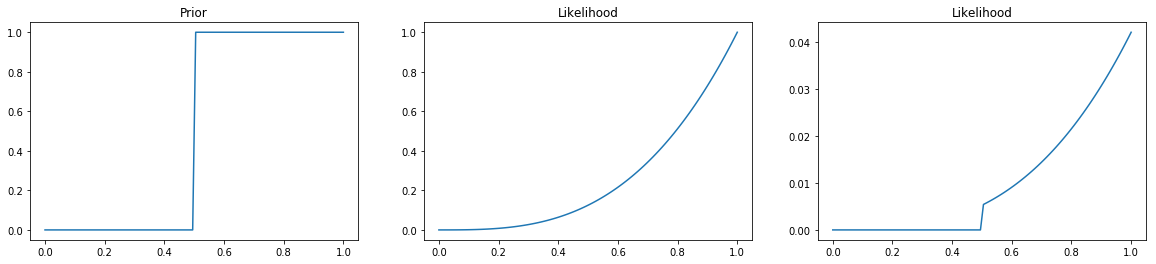

In [26]:
_2m2_posterior(w=3, n=3, obj=_2m2)

### Item 2 | W, W, W, L

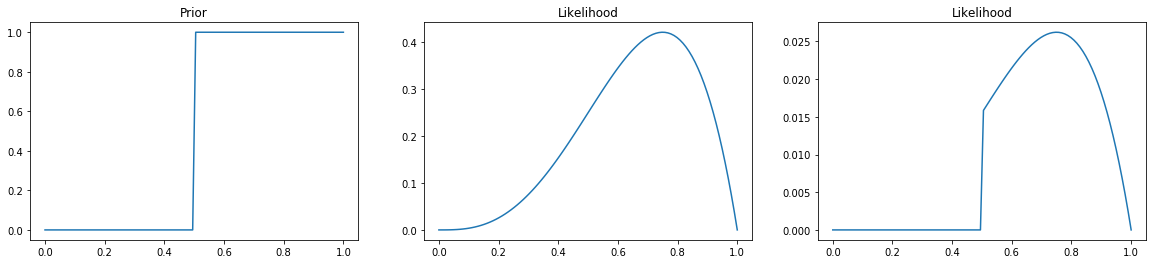

In [27]:
_2m2_posterior(w=3, n=4, obj=_2m2)

### Item 3 | L, W, W, L, W, W, W

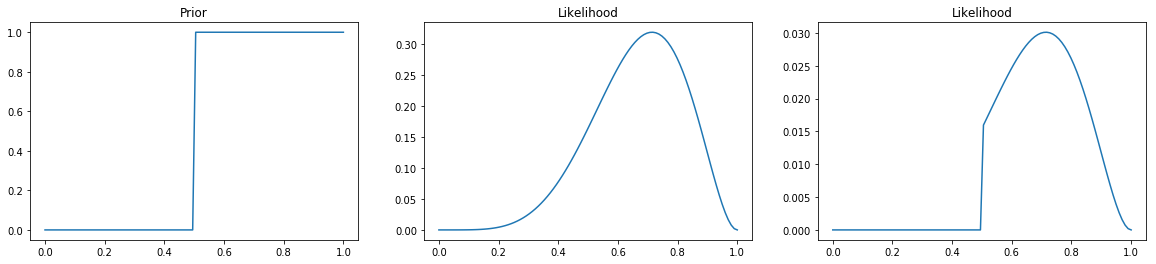

In [28]:
_2m2_posterior(w=5, n=7, obj=_2m2)

## 2M4 
Simulate the result: $\frac{2}{3}$

In [77]:
class Card:
    def __init__(self, sides_black):
        self.sides_black = sides_black
        
_2m4 = Object()
_2m4.cards = [Card([True, True]), Card([False, True]), Card([False, False])]

def _2m4_simulate(obj):
    obj.total_trials = 0
    obj.back_is_black = 0
    for i in range(20000):
        card = np.random.choice(obj.cards)
        # Choose random side, 0 or 1
        side = np.random.randint(0, 2)
        # Need a Black as a top side
        if not card.sides_black[side]:
            continue
        obj.total_trials += 1
        other_side = (side + 1) % 2
        if card.sides_black[other_side]:
            obj.back_is_black += 1
_2m4_simulate(_2m4)
print(_2m4.back_is_black / _2m4.total_trials, "vs", 2/3)

0.6626506024096386 vs 0.6666666666666666


## 2M5

The correct answer is $\frac{4}{5} = 0.80$

In [81]:
_2m5 = Object()
_2m5.cards = [Card([True, True]), Card([False, True]), Card([False, False]), Card([True, True])]
_2m4_simulate(_2m5)
print(_2m5.back_is_black / _2m5.total_trials, "vs", 4/5)

0.8012283640424344 vs 0.8
